In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from scipy.stats import spearmanr
from sklearn.preprocessing import StandardScaler

# models (linear regression, krr, xgb, tabPFN)
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge #krr
import xgboost as xgb #xgb

# feature selection + hyp opt
from sklearn.feature_selection import RFECV
from sklearn.metrics import get_scorer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from skopt import BayesSearchCV
from skopt.callbacks import DeadlineStopper, DeltaYStopper
from skopt.space import Real, Integer
from skopt.space import Categorical
from sklearn.inspection import permutation_importance
from loguru import logger
import os
import json

import warnings
warnings.simplefilter('ignore')

#### <b>Uncertainty plot for glass transition temperature (Tg)</b>

In [ ]:
label = "Tg"

snapshot = np.load(f"parity_snapshot_{label}.npy", allow_pickle=True).item()
y_test_loaded = snapshot["y_test"]
mean_preds_loaded = snapshot["mean_preds"]
std_preds_loaded = snapshot["std_preds"]
threshold_loaded = snapshot["threshold"]
mask_keep_loaded = snapshot["mask_keep"]
srcc_loaded = snapshot["srcc"]
mae_loaded = snapshot["mae"]

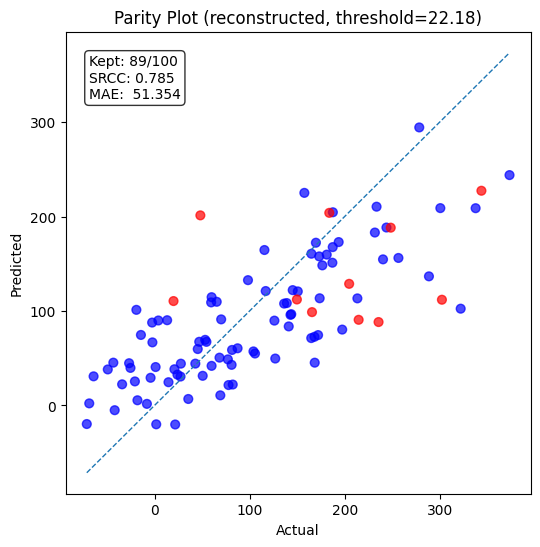

In [ ]:
colors_recon = np.where(std_preds_loaded > threshold_loaded, "red", "blue")
fig, ax = plt.subplots(figsize=(6, 6))
sc = ax.scatter(
    y_test_loaded,
    mean_preds_loaded,
    c=colors_recon,
    s=40,
    alpha=0.7
)
xy_min = min(y_test_loaded.min(), mean_preds_loaded.min())
xy_max = max(y_test_loaded.max(), mean_preds_loaded.max())
ax.plot([xy_min, xy_max], [xy_min, xy_max], "--", linewidth=1)
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
ax.set_title(
    f"Parity Plot (reconstructed, threshold={threshold_loaded:.2f})"
)
metrics_str = (
    f"Kept: {mask_keep_loaded.sum()}/{len(y_test_loaded)}\n"
    f"SRCC: {srcc_loaded:.3f}\n"
    f"MAE:  {mae_loaded:.3f}"
)
ax.text(
    0.05, 0.95, metrics_str,
    transform=ax.transAxes,
    va="top", ha="left",
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.8)
)
plt.show()

#### <b>Uncertainty plot for radius of gyration (Rg)</b>

In [ ]:
label = "Rg"

snapshot = np.load(f"parity_snapshot_{label}.npy", allow_pickle=True).item()
y_test_loaded = snapshot["y_test"]
mean_preds_loaded = snapshot["mean_preds"]
std_preds_loaded = snapshot["std_preds"]
threshold_loaded = snapshot["threshold"]
mask_keep_loaded = snapshot["mask_keep"]
srcc_loaded = snapshot["srcc"]
mae_loaded = snapshot["mae"]

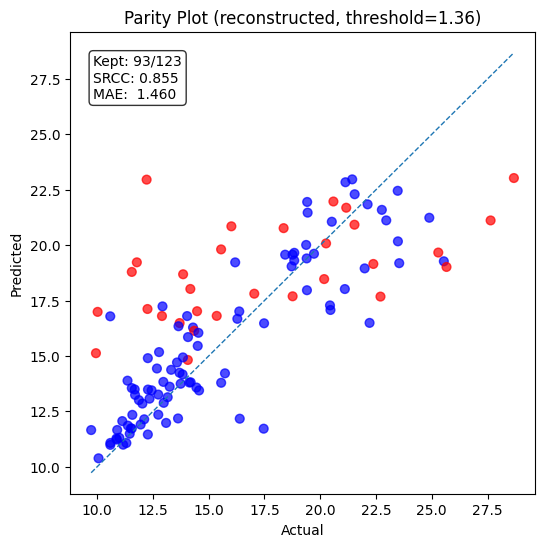

In [ ]:
colors_recon = np.where(std_preds_loaded > threshold_loaded, "red", "blue")
fig, ax = plt.subplots(figsize=(6, 6))
sc = ax.scatter(
    y_test_loaded,
    mean_preds_loaded,
    c=colors_recon,
    s=40,
    alpha=0.7
)
xy_min = min(y_test_loaded.min(), mean_preds_loaded.min())
xy_max = max(y_test_loaded.max(), mean_preds_loaded.max())
ax.plot([xy_min, xy_max], [xy_min, xy_max], "--", linewidth=1)
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
ax.set_title(
    f"Parity Plot (reconstructed, threshold={threshold_loaded:.2f})"
)
metrics_str = (
    f"Kept: {mask_keep_loaded.sum()}/{len(y_test_loaded)}\n"
    f"SRCC: {srcc_loaded:.3f}\n"
    f"MAE:  {mae_loaded:.3f}"
)
ax.text(
    0.05, 0.95, metrics_str,
    transform=ax.transAxes,
    va="top", ha="left",
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.8)
)
plt.show()